# WeRateDogs Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Project Motivation</a></li>
    <ul>
    <li><a href="#requirements">Requirements</a></li>
    </ul>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#gather">Gather</a></li>
    <li><a href="#assess">Asses</a></li>
        <ul>
        <li><a href="#visual">Visual Assess</a></li>
        <li><a href="#program">Programmatic Asses</a></li>
        <li><a href="#document">Document</a></li>
        </ul>
    <li><a href="#clean">Clean</a></li>
    <li><a href="#store">Store</a></li>
    </ul>
<li><a href="#visuals">Visual Utils Functions</a></li>
<li><a href="#analisis">Analyse and Visualize</a></li>
    <ul>
    <li><a href="#insight_1">Dogs insight</a></li>
    <li><a href="#insight_2">Dogs2 insight</a></li>
    <li><a href="#insight_3">Dog insgiht</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Project Motivation

This project intents to wrangle data from the Twitter [WeRateDogs](https://twitter.com/dog_rates) and analyze it.

<a id='requirements'></a>
#### Requirements

In [283]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import json
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline
sns.set_palette(sns.dark_palette("muted purple", input="xkcd", reverse=True))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<a id='wrangling'></a>
## Data Wrangling
<a id='gather'></a>
### Gather

#### from csv file

In [2]:
# Gather data from csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### from udacity's server

In [3]:
# Gather data from Udacity's server
server_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(server_url)
with open(os.path.join(server_url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
        
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
        

#### setup Twitter and get data to json_file

In [4]:
file_path = 'tweet_json.txt'

if not os.path.isfile(file_path):
    # Set keys to use tweepy
    consumer_key = os.environ('CONSUMER_KEY')
    consumer_secret = os.environ('CONSUMER_SECRET')
    access_token = os.environ('ACCESS_TOKEN')
    access_secret = os.environ('ACCESS_SECRET')

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

    start = time.time()
    print("Initiating...")

    # Write every tweet on its own line
    with open(file_path, 'w') as file:
        for i, tweet_id in enumerate(twitter_archive.tweet_id):
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, file)
                file.write("\n")
            except Exception as e: 
                print(e)
            finally:
                end = time.time()
                print(f'Tweet: {i+1} | Time elapsed: {end - start}')

#### read data from json

In [5]:
twitter_json = []

with open('tweet_json.txt','r') as file:
    for status in file:
        status = json.loads(status.strip())
        twitter_json.append({'tweet_id': status['id'],
                             'retweet_count': status['retweet_count'],
                             'favorite_count': status['favorite_count']})
        
additional_twitter_data = pd.DataFrame(twitter_json, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

<a id='assess'></a>
### Assess
<a id='visual'></a>
#### Visual Assess

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,1.566650e-01,True,Shetland_sheepdog,6.142850e-02,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,7.419170e-02,True,Rhodesian_ridgeback,7.201000e-02,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,1.385840e-01,True,bloodhound,1.161970e-01,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,3.606870e-01,True,miniature_pinscher,2.227520e-01,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,2.436820e-01,True,Doberman,1.546290e-01,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,2.637880e-01,True,Greater_Swiss_Mountain_dog,1.619920e-02,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,5.827940e-02,True,fur_coat,5.444860e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,1.923050e-01,True,soft-coated_wheaten_terrier,8.208610e-02,True


In [8]:
additional_twitter_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7976,37212
1,892177421306343426,5918,32008
2,891815181378084864,3911,24098
3,891689557279858688,8122,40540
4,891327558926688256,8807,38761
5,891087950875897856,2930,19478
6,890971913173991426,1943,11368
7,890729181411237888,17756,62788
8,890609185150312448,4029,26790
9,890240255349198849,6939,30700


<a id='program'></a>
#### Programmatic Asses

In [9]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [10]:
twitter_archive.tail(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.text.apply(lambda x: x[:4] == 'RT @').sum()

181

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twitter_archive.duplicated().sum()

0

In [15]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

I saw, in the visual assessment that the row with index=6 has a wrong expanded url, but are there many more?

In [19]:
url = 'https://twitter.com/dog_rates/status/'

In [20]:
twitter_archive.shape[0] - twitter_archive.expanded_urls.str.startswith(url).sum()

257

In [21]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [22]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
image_predictions[image_predictions['p1_conf'] <= 0.0444]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
38,666644823164719104,https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg,1,Ibizan_hound,0.044333,True,Pembroke,0.043209,True,West_Highland_white_terrier,0.038906,True


In [25]:
image_predictions.duplicated().sum()

0

In [26]:
additional_twitter_data.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7976,37212
1,892177421306343426,5918,32008
2,891815181378084864,3911,24098


In [27]:
additional_twitter_data.tail(3)

,tweet_id,retweet_count,favorite_count
2329,666033412701032449,43,121
2330,666029285002620928,45,124
2331,666020888022790149,481,2479


In [28]:
additional_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id          2332 non-null int64
retweet_count     2332 non-null int64
favorite_count    2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [29]:
additional_twitter_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.332000e+03,2332.000000,2332.000000
mean,7.419284e+17,2801.876930,7761.890223
std,6.822070e+16,4742.296776,12048.464149
min,6.660209e+17,1.000000,0.000000
25%,6.782728e+17,561.750000,1347.750000
50%,7.183508e+17,1311.500000,3379.500000
75%,7.986673e+17,3261.750000,9520.500000
max,8.924206e+17,80496.000000,160823.000000


In [30]:
additional_twitter_data.duplicated().sum()

0

<a id='document'></a>
### Issues documentation
### Quality

#### `twitter_archive`

- There are data for `retweets`.
- There are `NaN` values for the columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
- There are `NaN` values for the columns: in_reply_to_status_id, in_reply_to_user_id.
- There are missing values for doggo, floofer, pupper, puppo, which are represented as a string `None`.
- There are missing values for name, which are represented as a string `None`.
- Missing expanded_urls (2297 instead of 2356).
- Row with index=6 has an expanded_url not from twitter. Totally, there are 257 urls in this condition.
- Some dogs have English articles as their names, such as: `a`, `an`, `the`; Others have even words, for example `quite`.
- Timestamp column has wrong data type.
- Wrong data types for columns: in_reply_to_status_id, in_reply_to_user_id.
- Wrong data types for columns: retweeted_status_id, retweeted_status_user_id.
- The column `source` will not be used.

#### `image_predictions`

- The dogs' breeds names have no standard, some start with capital letter and others not.
- Some predictions are not dog breeds.
- Missing data (2075 instead of 2356).

#### `additional_twitter_data`
- Missing data (2332 instead of 2356).


### Tidiness
#### `twitter_archive`
- The columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp will not be used.
- The columns in_reply_to_status_id and in_reply_to_user_id can be a boolean variable that indicates if the tweet is a reply or not.
- The columns doggo, floofer, pupper, puppo are all categories for the dog stage.

#### `image_predictions`
- The columns p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog have no semantic names.
- The columns p1, p2 and p3 are breed predictions for the same dog, the first one is the most accurate, and should be enough.
- The prediction for the dog breed is part of the observational unit `tweet`.

#### `additional_twitter_data`
- The columns `retweet_count` and `favorite_count` should be part of `twitter_archive` DataFrame.

---

<a id='clean'></a>
### Clean
In this section, the issues identified above will be fixed.

In [31]:
twitter_clean = twitter_archive.copy()
predictions_clean = image_predictions.copy()

---
#### Note:
**It's recommended to start cleaning the data that is missing, and then treat the tidiness issues. However, for this wrangling I understand that is better to make the data tidy, because it will already fix some problems of missing data as well. Furthermore, the motivation of this project is to analyze data only from original tweets, then I should clean the retweets firstly.**

---
*There are data for `retweets`.*

#### Define
Delete the rows where the folowing columns are not null:
- `retweeted_status_id` and `retweeted_status_user_id` and `retweeted_status_timestamp`
As for every row that `retweeted_status_id` is filled the others are as well, it's just delete the rows where this column is not empty.

#### Code

In [32]:
twitter_clean = twitter_clean.query('retweeted_status_id.isna()')

#### Test

In [33]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [34]:
assert twitter_clean.retweeted_status_id.isna().sum() == twitter_clean.shape[0]

### Clean tidiness issues and some missing as well
#### `twitter_archive`
*The columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp will not be used.*

*Wrong data types for columns: retweeted_status_id, retweeted_status_user_id.*

##### Completeness
*There are NaN values for the columns: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.*

#### Define
Drop the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp from twitter_clean DataFrame.

#### Code

In [35]:
twitter_clean.drop(columns=['retweeted_status_id',
                            'retweeted_status_user_id',
                            'retweeted_status_timestamp'], inplace=True)

#### Test

In [36]:
twitter_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


---
#### `twitter_archive`
*The columns in_reply_to_status_id and in_reply_to_user_id can be a boolean variable that indicates if the tweet is a reply or not.*

*Wrong data types for columns: in_reply_to_status_id, in_reply_to_user_id.*

##### Completeness
*There are `NaN` values for the columns: in_reply_to_status_id, in_reply_to_user_id.*

#### Define
Create one column with a boolean value that is True if it's a reply and False if it isn't. Delete the columns `in_reply_to_status_id`, `in_reply_to_user_id` after that.

#### Code

In [37]:
twitter_clean['is_a_reply'] = ~twitter_clean.in_reply_to_status_id.isnull()

In [38]:
twitter_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)

#### Test

In [39]:
twitter_clean.sample(3, random_state=43)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,is_a_reply
2139,670037189829525505,2015-11-27 00:31:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Awesome dog here. Not sure where it is tho. Sp...,https://twitter.com/dog_rates/status/670037189...,5,10,None,None,None,None,None,False
275,840696689258311684,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,None,None,None,False
2309,666804364988780544,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None,False


---
#### `twitter_archive`
*The columns doggo, floofer, pupper, puppo are all categories for the dog stage.*

##### Completeness
*There are missing values for name, doggo, floofer, pupper, puppo, which are represented as a string `None`.*

#### Define
1- Replace the `None` string with an empty one for the columns: doggo, floofer, pupper, puppo; 2 - create a column for the stage information to fill it in with the data from the columns `doggo`, `floofer`, `pupper`, `puppo`; 3 - drop the columns used to create the dog_stage.

#### Code

In [40]:
twitter_clean[['doggo', 'floofer',
               'pupper', 'puppo']] = twitter_clean[['doggo', 'floofer',
                                                    'pupper', 'puppo']].replace(to_replace=['None'], value='')

twitter_clean['dog_stage'] = twitter_clean.apply(lambda x: x.doggo or x.floofer or x.pupper or x.puppo, axis=1)

In [41]:
twitter_tidy = twitter_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

#### Test

In [42]:
twitter_tidy.dog_stage.value_counts()

           1831
pupper      224
doggo        87
puppo        24
floofer       9
Name: dog_stage, dtype: int64

In [43]:
twitter_tidy.sample(5, random_state=7)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,is_a_reply,dog_stage
2206,668631377374486528,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,https://twitter.com/dog_rates/status/668631377...,5,10,Zeek,False,
857,763956972077010945,2016-08-12 04:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@TheEllenShow I'm not sure if you know this bu...,NaN,12,10,None,True,doggo
925,755110668769038337,2016-07-18 18:43:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Watson. He trust falls on command. 13/...,https://twitter.com/dog_rates/status/755110668...,13,10,Watson,False,
1974,673148804208660480,2015-12-05 14:35:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fletcher. He's had a ruff night. No mo...,https://twitter.com/dog_rates/status/673148804...,8,10,Fletcher,False,pupper
63,879862464715927552,2017-06-28 00:42:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Romeo. He would like to do an entrance...,https://twitter.com/dog_rates/status/879862464...,13,10,Romeo,False,


---
#### `image_predictions`
*The columns p1, p2 and p3 are breed predictions for the same dog, the first one is the most accurate, and should be enough.*

##### Quality - Accuracy
*Some predictions are not dog breeds.*

#### Define
Get the best predicition for each dog, and `p1` should be the best prediction for the dog breed. The predictions where `p1_dog = True` I will keep it. If it's False, and `p2_dog = True` I will use p2. If p2 is also False, and `p3_dog = True`, I will keep p3. For those rows where none of the three predictions are dog, I will keep `p1` to further analysis.

#### Code

In [44]:
def prediction(x):
    pred = x.p1
    conf = x.p1_conf
    is_dog = x.p1_dog
    if x.p1_dog:
        pass
    elif x.p2_dog:
        pred = x.p2
        conf = x.p2_conf
        is_dog = x.p2_dog
    elif x.p3_dog:
        pred = x.p3
        conf = x.p3_conf
        is_dog = x.p3_dog
        
    return pd.Series({'pred': pred, 'conf': conf, 'is_dog': is_dog})

In [45]:
partial_df = predictions_clean.drop(columns=['tweet_id', 'jpg_url', 'img_num'])

predictions_clean[['best_prediction', 'confidence_level', 'is_dog']] = partial_df.apply(prediction, axis=1)

#### Test

In [46]:
predictions_clean.sample(3, random_state=43)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_prediction,confidence_level,is_dog
284,671141549288370177,https://pbs.twimg.com/media/CVBfrU9WUAApDeV.jpg,1,guinea_pig,0.387728,False,wood_rabbit,0.171681,False,borzoi,0.075358,True,borzoi,0.075358,True
982,707387676719185920,https://pbs.twimg.com/media/CdElVm7XEAADP6o.jpg,1,Chihuahua,0.888468,True,Italian_greyhound,0.088635,True,toy_terrier,0.015938,True,Chihuahua,0.888468,True
1014,709566166965075968,https://pbs.twimg.com/media/Cdjiqi6XIAIUOg-.jpg,1,chow,0.999837,True,Tibetan_mastiff,0.000117,True,Australian_terrier,0.000011,True,chow,0.999837,True


---
#### `image_predictions`
*The columns p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog have no semantic names.*

#### Define
Drop the columns p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog, since the data has been treated before and this columns are not needed anymore. The img_num can be dropped too, because it's not going to be used.

#### Code

In [47]:
predictions_tidy = predictions_clean.drop(columns=['p1', 'p1_conf', 'p1_dog',
                                                    'p2', 'p2_conf', 'p2_dog',
                                                    'p3', 'p3_conf', 'p3_dog',
                                                    'img_num'])

#### Test

In [48]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null int64
p1                  2075 non-null object
p1_conf             2075 non-null float64
p1_dog              2075 non-null bool
p2                  2075 non-null object
p2_conf             2075 non-null float64
p2_dog              2075 non-null bool
p3                  2075 non-null object
p3_conf             2075 non-null float64
p3_dog              2075 non-null bool
best_prediction     2075 non-null object
confidence_level    2075 non-null float64
is_dog              2075 non-null bool
dtypes: bool(4), float64(4), int64(2), object(5)
memory usage: 186.5+ KB


In [49]:
predictions_tidy.sample(3, random_state=37)

,tweet_id,jpg_url,best_prediction,confidence_level,is_dog
861,697242256848379904,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,Eskimo_dog,0.063533,True
864,697270446429966336,https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg,toy_poodle,0.880014,True
1533,789986466051088384,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,golden_retriever,0.078530,True


---
<a id='expanded'></a>
#### `image_predictions`
*The prediction for the dog breed is part of the observational unit `tweet`, and could be at the `twitter_archive` DataFrame.*

##### Completeness
*Missing data (2075 instead of 2356).*

#### Define
Merge twitter_tidy and predictions_tidy DataFrames using the column `tweet_id`. The merge will be performed using the clause `how='inner'`, because to future analysis the data for the predictions can't be missing.

#### Code

In [50]:
twitter_tidy = twitter_tidy.merge(predictions_tidy, on='tweet_id', how='inner')

#### Test

In [51]:
twitter_tidy.sample(3, random_state=13)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,is_a_reply,dog_stage,jpg_url,best_prediction,confidence_level,is_dog
177,848212111729840128,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,False,,https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg,Bedlington_terrier,0.333486,True
1382,680145970311643136,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,False,pupper,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,miniature_poodle,0.457117,True
640,761292947749015552,2016-08-04 20:09:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bonaparte. He's pupset because it's cloud...,https://twitter.com/dog_rates/status/761292947...,11,10,Bonaparte,False,,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,standard_poodle,0.660893,True


In [52]:
twitter_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
is_a_reply            1994 non-null bool
dog_stage             1994 non-null object
jpg_url               1994 non-null object
best_prediction       1994 non-null object
confidence_level      1994 non-null float64
is_dog                1994 non-null bool
dtypes: bool(2), float64(1), int64(3), object(8)
memory usage: 206.4+ KB


---
#### `additional_twitter_data`
*The columns `retweet_count` and `favorite_count` should be part of `twitter_archive` DataFrame.*

##### Completeness
*Missing data (2332 instead of 2356).*

#### Define
Merge twitter_tidy and additional_twitter_data using the column `tweet_id`. The merge will be performed using the clause `how='inner'`, because to future analysis the data for the retweets and favorites count can't be missing.

#### Code

In [53]:
twitter_tidy = twitter_tidy.merge(additional_twitter_data, on='tweet_id', how='inner')

#### Test

In [54]:
twitter_tidy.sample(3, random_state=13)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,is_a_reply,dog_stage,jpg_url,best_prediction,confidence_level,is_dog,retweet_count,favorite_count
1641,672466075045466113,2015-12-03 17:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franq and Pablo. They're working hard ...,https://twitter.com/dog_rates/status/672466075...,12,10,Franq,False,,https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg,cocker_spaniel,0.150424,True,535,1348
83,872620804844003328,2017-06-08 01:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,False,,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,cocker_spaniel,0.513191,True,3486,20077
1318,683098815881154561,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,https://twitter.com/dog_rates/status/683098815...,12,10,None,False,,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,golden_retriever,0.889848,True,677,2214


---
### Quality issues

Fix the missing issues that still are present in the DataFrame.

#### `twitter_archive`

*There are missing values for doggo, floofer, pupper, puppo, which are represented as a string `None`.*

#### Define
Change the empty strings in the previously created column `dog_stage` to NaN (np.NaN) values to represent correctly the missing data.

#### Code

In [55]:
twitter_tidy[['dog_stage']] = twitter_tidy[['dog_stage']].replace(to_replace='', value=np.NaN)

#### Test

In [56]:
twitter_tidy.sample(3, random_state=13)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,is_a_reply,dog_stage,jpg_url,best_prediction,confidence_level,is_dog,retweet_count,favorite_count
1641,672466075045466113,2015-12-03 17:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franq and Pablo. They're working hard ...,https://twitter.com/dog_rates/status/672466075...,12,10,Franq,False,NaN,https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg,cocker_spaniel,0.150424,True,535,1348
83,872620804844003328,2017-06-08 01:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,False,NaN,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,cocker_spaniel,0.513191,True,3486,20077
1318,683098815881154561,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,https://twitter.com/dog_rates/status/683098815...,12,10,None,False,NaN,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,golden_retriever,0.889848,True,677,2214


---
#### `twitter_archive`

*There are missing values for name, which are represented as a string `None`.*

*Some dogs have English articles as their names, such as: `a`, `an`, `the`; Others have even words, for example `quite`.*

#### Define
Replace the `None` values in the `name` column to np.NaN, so the missing data is properly represented. Also, replace the names that are articles that were incorrectly extracted before.

#### Code

In [57]:
twitter_tidy[['name']] = twitter_tidy[['name']].replace(to_replace=['None', 'a', 'an', 'the', 'quite'], value=np.NaN)

#### Test

In [58]:
twitter_tidy.query('name == "a" or name == "an" or name == "the" or name == "quite"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,is_a_reply,dog_stage,jpg_url,best_prediction,confidence_level,is_dog,retweet_count,favorite_count


In [59]:
twitter_tidy.sample(3, random_state=13)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,is_a_reply,dog_stage,jpg_url,best_prediction,confidence_level,is_dog,retweet_count,favorite_count
1641,672466075045466113,2015-12-03 17:23:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franq and Pablo. They're working hard ...,https://twitter.com/dog_rates/status/672466075...,12,10,Franq,False,NaN,https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg,cocker_spaniel,0.150424,True,535,1348
83,872620804844003328,2017-06-08 01:06:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13,10,Monkey,False,NaN,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,cocker_spaniel,0.513191,True,3486,20077
1318,683098815881154561,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,https://twitter.com/dog_rates/status/683098815...,12,10,NaN,False,NaN,https://pbs.twimg.com/media/CXrawAhWkAAWSxC.jpg,golden_retriever,0.889848,True,677,2214


---
#### `twitter_archive`

*Missing expanded_urls (2297 instead of 2356).* This issue was solved in [this](#expanded) cleaning step.

*Row with index=6 has an expanded_url not from twitter. Totally, there are 28 urls in this condition.*


#### Define
Delete the columns expanded_urls, since it will not be used in the analysis.

#### Code

In [60]:
twitter_tidy.drop(columns=['expanded_urls'], inplace=True)

#### Test

In [61]:
twitter_tidy.sample(3, random_state=43)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,is_a_reply,dog_stage,jpg_url,best_prediction,confidence_level,is_dog,retweet_count,favorite_count
731,748699167502000129,2016-07-01 02:06:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Tripp. He's being eaten by a sherk and do...,11,10,Tripp,False,NaN,https://pbs.twimg.com/media/CmPp5pOXgAAD_SG.jpg,Pembroke,0.849029,True,1649,4887
628,762316489655476224,2016-08-07 15:56:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He specializes in mid-air freez...,11,10,Scout,False,NaN,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,African_grey,0.270468,False,1167,4979
1203,690248561355657216,2016-01-21 19:04:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxwell. That's his moped. He rents it...,11,10,Maxwell,False,NaN,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,motor_scooter,0.382690,False,427,1722


---
#### `twitter_archive`
*Timestamp column has wrong data type.*

#### Define
Change column `timestamp` to datetime type.

#### Code

In [62]:
twitter_tidy.timestamp = pd.to_datetime(twitter_tidy.timestamp)

#### Test

In [63]:
twitter_tidy.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,is_a_reply,dog_stage,jpg_url,best_prediction,confidence_level,is_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,False,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,7976,37212
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,False,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,5918,32008


In [64]:
twitter_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 15 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null datetime64[ns, UTC]
source                1986 non-null object
text                  1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1369 non-null object
is_a_reply            1986 non-null bool
dog_stage             305 non-null object
jpg_url               1986 non-null object
best_prediction       1986 non-null object
confidence_level      1986 non-null float64
is_dog                1986 non-null bool
retweet_count         1986 non-null int64
favorite_count        1986 non-null int64
dtypes: bool(2), datetime64[ns, UTC](1), float64(1), int64(5), object(6)
memory usage: 221.1+ KB


---
#### `twitter_archive`
*The column `source` will not be used.*

#### Define
Drop the column `source`.

#### Code

In [65]:
twitter_tidy.drop(columns=['source'], inplace=True)

#### Test

In [66]:
twitter_tidy.sample(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,is_a_reply,dog_stage,jpg_url,best_prediction,confidence_level,is_dog,retweet_count,favorite_count
627,762464539388485633,2016-08-08 01:44:46+00:00,This is Buddy. His father was a bear and his m...,12,10,Buddy,False,NaN,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,chow,0.999953,True,4361,10679
170,849776966551130114,2017-04-06 00:13:11+00:00,Seriously guys? Again? We only rate dogs. Plea...,12,10,NaN,False,NaN,https://pbs.twimg.com/media/C8sDpDWWsAE5P08.jpg,Chihuahua,0.292092,True,7681,30825


---
#### `image_predictions`

*The dogs' breeds names have no standard, some start with capital letter and others not.*

#### Define
Change all caracteres to lower case.

#### Code

In [67]:
twitter_tidy.best_prediction = twitter_tidy.best_prediction.str.lower()

#### Test

In [68]:
assert twitter_tidy.best_prediction.str.islower().sum() == twitter_tidy.shape[0]

---
Now that the data is clean, I will copy it to a DataFrame named twitter_data for the next steps.

In [69]:
twitter_data = twitter_tidy.copy()

In [70]:
twitter_tidy

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,is_a_reply,dog_stage,jpg_url,best_prediction,confidence_level,is_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,False,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,7976,37212
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,False,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,chihuahua,0.323581,True,5918,32008
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,False,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,chihuahua,0.716012,True,3911,24098
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,False,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,labrador_retriever,0.168086,True,8122,40540
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,False,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,8807,38761
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13,10,NaN,False,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,chesapeake_bay_retriever,0.425595,True,2930,19478
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,False,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,appenzeller,0.341703,True,1943,11368
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13,10,NaN,False,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,pomeranian,0.566142,True,17756,62788
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,False,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,irish_terrier,0.487574,True,4029,26790
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14,10,Cassie,False,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,pembroke,0.511319,True,6939,30700


---
<a id='store'></a>
### Store
In this step, the data cleaned and tidy can be stored into a csv file.

In [71]:
twitter_data.to_csv('twitter_archive_master.csv', index=False)

---
<a id='analisis'></a>
### Analyze and Visualize

In this section, I will be analysing the data to get some insights. Following, I will answer this questions:

1. Which are the dog breeds most common in these tweets?
2. Which are the top 5 breeds with the best rating?
3. Is there a correlation between the rating and the retweets or the favorites?
4. The highest confidence levels for the prediction algorithm are associated with which dog breeds?

...some other questions that we could answer with this dataset, but I will not cover in this analysis:
1. How are the ratings related to the dog stages?
2. Is there a time during the day that the tweet gets more retweets?
3. What is present in a picture that have not a prediction for a dog?
4. Which breeds were more favorited?
5. Are tweets with the dog's name more engaging (has more retweets and favorites)?

Firstly, I will separate two dfs for dogs and no dogs predicitions.

In [82]:
twitter_dogs = twitter_data[twitter_data['is_dog'] == True]
twitter_not_dogs = twitter_data[twitter_data['is_dog'] == False]

#### 1. Which are the dog breeds most common in these tweets?

In [196]:
most_common = twitter_dogs.best_prediction.value_counts().head(5)
most_common

golden_retriever      158
labrador_retriever    106
pembroke               95
chihuahua              91
pug                    62
Name: best_prediction, dtype: int64

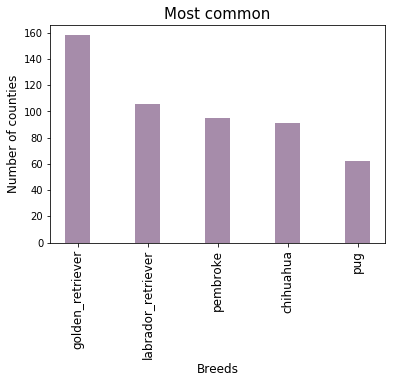

In [306]:
plot_visual(most_common, 'Breeds', 'Number of counties', 'Most common')

#### 2. Which are the top 5 breeds with the best rating?

In [101]:
twitter_dogs.rating = twitter_dogs['rating_numerator'] / twitter_dogs['rating_denominator']

In [304]:
best_rated = twitter_dogs.groupby('best_prediction').rating.median().sort_values(ascending=False).head()
best_rated

best_prediction
clumber                 2.7
afghan_hound            1.3
bouvier_des_flandres    1.3
saluki                  1.3
gordon_setter           1.2
Name: rating, dtype: float64

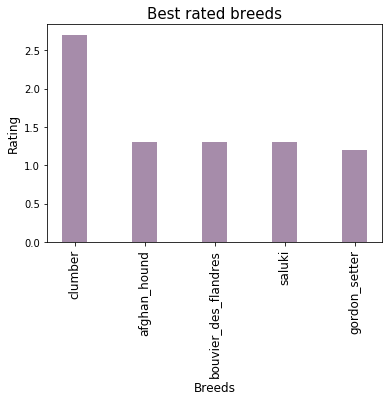

In [305]:
plot_visual(best_rated, 'Breeds', 'Rating', 'Best rated breeds')

#### 3. Is there a correlation between the rating and the retweets or the rating and the favorites?

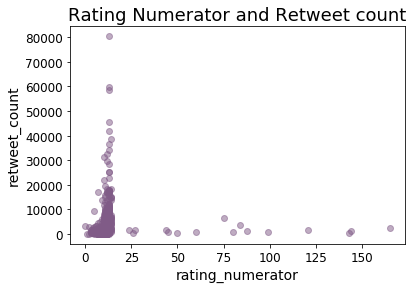

In [240]:
plot_one_scatter(twitter_dogs[['rating_numerator']], twitter_dogs[['retweet_count']],
                 'Rating Numerator and Retweet count')

In [112]:
twitter_dogs[['rating_numerator', 'retweet_count']].corr()

,rating_numerator,retweet_count
rating_numerator,1.000000,0.047432
retweet_count,0.047432,1.000000


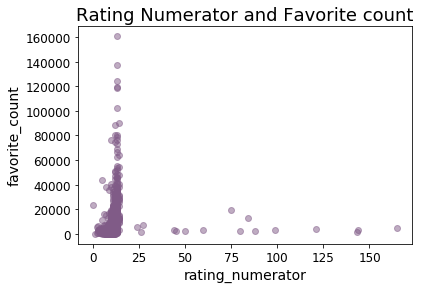

In [241]:
plot_one_scatter(twitter_dogs[['rating_numerator']], twitter_dogs[['favorite_count']],
                 'Rating Numerator and Favorite count')

In [124]:
twitter_dogs[['rating_numerator', 'favorite_count']].corr()

,rating_numerator,favorite_count
rating_numerator,1.000000,0.060748
favorite_count,0.060748,1.000000


As we can see above, there is a weak correlation between the rating and the retweets and favorites.

So, the question that came up to my mind was **"Is there any breed that relates to more retweets or favorites?"**

In [245]:
# Creates a rate between the summed retweets and favorites and the number of counties
summed_values = twitter_dogs.groupby('best_prediction').sum()[['retweet_count', 'favorite_count']]
total_breads = twitter_dogs.groupby('best_prediction').count()[['rating']]
tweet_rate = summed_values.join(total_breads)

In [246]:
tweet_rate['rate_retweeted'] = tweet_rate.retweet_count / tweet_rate.rating
tweet_rate['rate_favorite'] = tweet_rate.favorite_count / tweet_rate.rating

In [247]:
# Select only breeds that had a minimun appearance
breeds_indices = (tweet_rate.query('rating >= 20')).index

In [248]:
top_10_retweeted = tweet_rate.loc[breeds_indices].sort_values(by='rate_retweeted', ascending=False).head(10)

In [249]:
top_10_favorited = tweet_rate.loc[breeds_indices].sort_values(by='rate_favorite', ascending=False).head(10)

In [279]:
top_10_favorited.rate_favorite

best_prediction
french_bulldog        19230.800000
cocker_spaniel        12989.133333
samoyed               12946.439024
eskimo_dog            12217.181818
cardigan              12053.047619
golden_retriever      11748.537975
labrador_retriever    10958.707547
pembroke              10482.410526
malamute              10194.181818
german_shepherd        9718.952381
Name: rate_favorite, dtype: float64

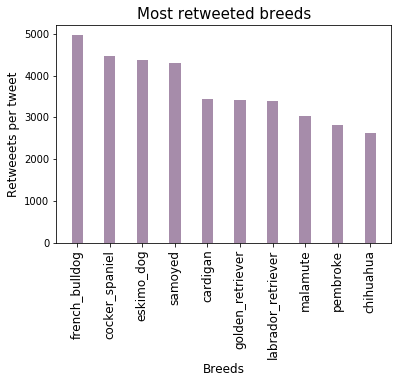

In [276]:
plot_visual(top_10_retweeted.rate_retweeted, 'Breeds', 'Retweeets per tweet', 'Most retweeted breeds')

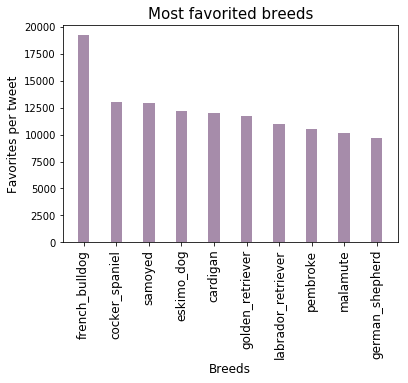

In [280]:
plot_visual(top_10_favorited.rate_favorite, 'Breeds', 'Favorites per tweet', 'Most favorited breeds')

The most retweeted and favorited breeds are very similiar. The top 9 are the same, with a little difference in the order. Just for curiosity, I will print below the most retweeted French Bulldog, since, this is the most retweeted and favorited breed.

In [300]:
max_retweets_bulldog = twitter_dogs.query('best_prediction == "french_bulldog"').retweet_count.max()
bulldog_url = twitter_dogs.query(f'retweet_count == {max_retweets_bulldog}').jpg_url.values[0]

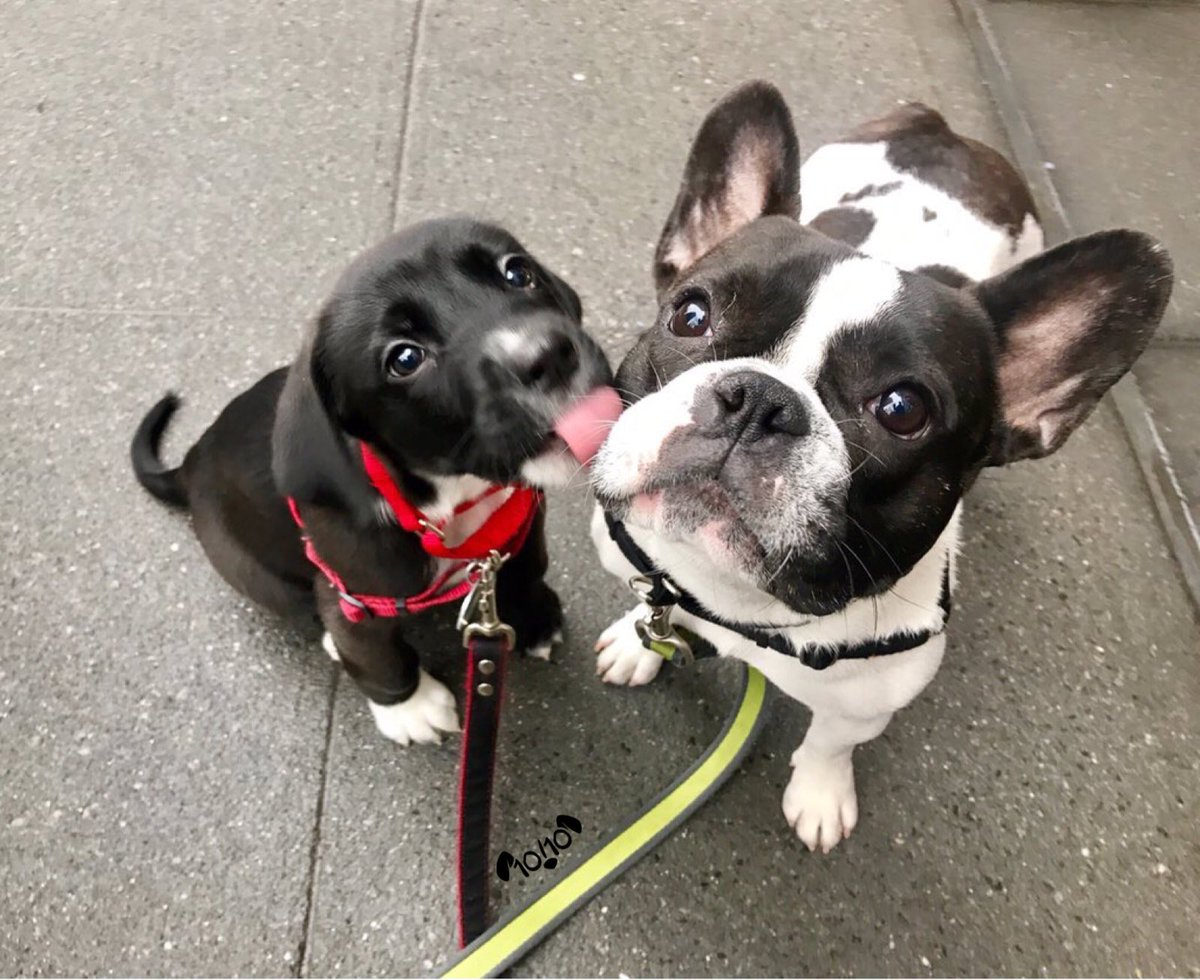

In [302]:
Image(bulldog_url)

---
#### 4. The highest confidence levels for the prediction algorithm are associated with which dog breeds?

In [318]:
breeds_indices = (twitter_dogs.best_prediction.value_counts() >= 20).index

In [319]:
prediction_confidence = twitter_dogs.groupby('best_prediction').median()[['confidence_level']]

In [320]:
highest_conf = prediction_confidence.loc[breeds_indices].sort_values(by='confidence_level', ascending=False).head()
highest_conf

,confidence_level
komondor,0.974781
clumber,0.946718
keeshond,0.936476
blenheim_spaniel,0.915452
samoyed,0.897312


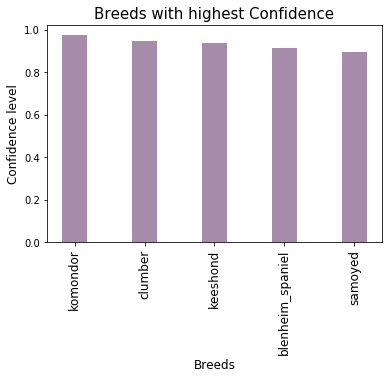

In [321]:
plot_visual(highest_conf.confidence_level, 'Breeds', 'Confidence level', 'Breeds with highest Confidence')

In [282]:
# function to plot one scatter plot
def plot_one_scatter(df_x, df_y, title):

    plt.scatter(df_x, df_y, alpha=0.5)
    plt.xlabel(df_x.columns[0], fontsize=14)
    plt.ylabel(df_y.columns[0], fontsize=14)
    plt.title(title, fontsize=18)
    plt.tick_params(axis='both', labelsize=12)
    plt.show()
    
# plot visual
def plot_visual(data, x_label, y_label, title):
    ind = np.arange(len(data))  # the x locations for the groups

    # plot bars
    plt.bar(ind, data, width, alpha=.7)

    # title and labels
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel('Breeds', fontsize=12)
    plt.xticks(rotation=90, fontsize=12)
    plt.title(title, fontsize=15)
    locations = ind  # xtick locations
    labels = data.index # xtick labels
    plt.xticks(locations, labels)